## K-Means Clustering
Unsupervised learning

In [108]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [109]:
df = pd.read_csv('./data/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


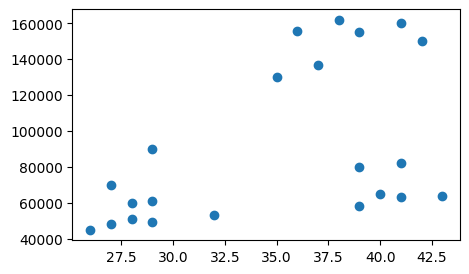

In [110]:
plt.figure( figsize=(5,3) )
plt.scatter(df['Age'], df['Income($)'])

In [111]:
km = KMeans(n_clusters=3)  # K=3

In [112]:
len(df)

22

In [113]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])
print(y_pred.shape)
y_pred

(22,)


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [114]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


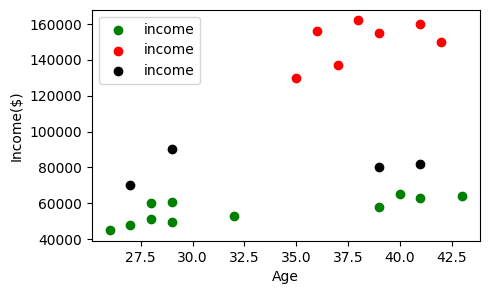

In [115]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

plt.figure( figsize=(5, 3) )

plt.scatter(df1.Age, df1['Income($)'], color='green', label='income')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='income')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='income')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [116]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


### After Feature Scaling

In [117]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform( df[['Income($)']] )

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [118]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [119]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

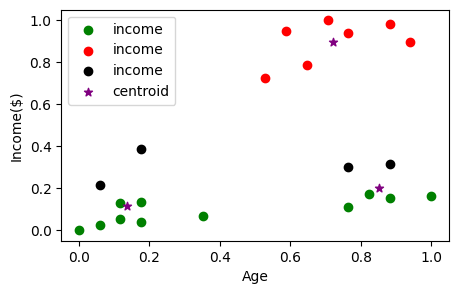

In [120]:
## For few features scatter plot is applicable
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

plt.figure( figsize=(5, 3) )

plt.scatter(df1.Age, df1['Income($)'], color='green', label='income')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='income')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='income')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')


plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [121]:
## For many features, Elbow method is used
k_rng = range(1, 10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)  # calculating sum of squared error

sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.40266726804338093,
 0.3228735504635307,
 0.23854237996006705,
 0.19234897613331944,
 0.17408977126837122,
 0.1174562753515376]

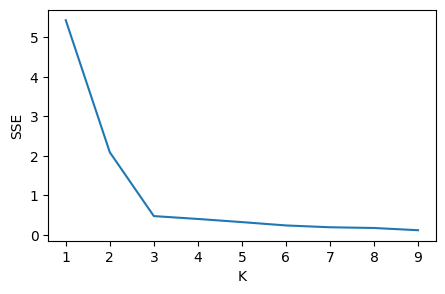

In [122]:
plt.figure( figsize=(5, 3) )
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng, sse)


Here, 3 is the elbow. So, k=3 will be perfect